In [1]:
#importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the file
df = pd.read_csv("Real_Combine.csv")

In [3]:
#removing the rows having null values
df=df.dropna()

In [4]:
X= df.iloc[:,:-1] #independent features
y = df.iloc[:,-1] #dependent feature

In [5]:
X.isnull()

,T,TM,Tm,SLP,H,VV,V,VM
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1088,False,False,False,False,False,False,False,False
1089,False,False,False,False,False,False,False,False
1090,False,False,False,False,False,False,False,False
1091,False,False,False,False,False,False,False,False


In [6]:
y.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1088    False
1089    False
1090    False
1091    False
1092    False
Name: PM 2.5, Length: 1092, dtype: bool

In [7]:
#importing the ensemble methods
#fits a number of randomized decision trees
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)


ExtraTreesRegressor()

In [8]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [9]:
#printing the correlated value of x and y for finding model feature
print(model.feature_importances_)


[0.16466795 0.0928222  0.21275001 0.16589248 0.08422224 0.18125573
 0.05505964 0.04332975]


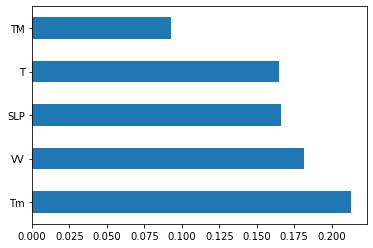

In [10]:
#finding the levels of each column
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [11]:
#train and test the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
#returns score of test dataset
from sklearn.model_selection import cross_val_score
#importing linearregression
from sklearn.linear_model import LinearRegression

In [13]:
#printing the mean squared error of linearregression
lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-3686.2017773398875


In [14]:
#ridge-reduces complexity of the model
from sklearn.linear_model import Ridge
#to select the best coefficient value
from sklearn.model_selection import GridSearchCV


In [15]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [16]:
#ridgeregressor used when the data suffers from multicollinearity(independent variables are highly correlated)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)


{'alpha': 40}
-3664.36489960717


In [17]:
#lasso-feature selection and regularization of data models
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


In [18]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1444189.621945961, tolerance: 614.5592033746461
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1568739.817138154, tolerance: 678.9710639134807
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1456481.2280784103, tolerance: 626.8737580831347
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarni

{'alpha': 1}
-3666.78325343702


In [19]:
prediction=lasso_regressor.predict(X_test)

In [20]:
#importing the metrics
from sklearn import metrics

In [21]:
#finding the error between actual value vs predicted value
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 44.50831198875126
MSE: 3627.8109390424697
RMSE: 60.2313119485411


In [22]:
#loading pickle to create an empty file
import pickle 


In [23]:
file = open('lasso_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(lasso_regressor, file)
